In [752]:
import sklearn 
# import des librairies dont nous aurons besoin
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split ,cross_val_score,KFold,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge

# chargement et affichage des données


In [753]:

# chargement et affichage des données
data = pd.read_csv('dataset_assurance.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### Séparer ma target  de mon dataframe


In [754]:

target=pd.DataFrame(data['charges'])
    
target


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


### Supprimer la target de mon df

In [755]:
data.drop(['charges'] , axis=1,inplace=True)
data

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


### Remplacer les données

### Séparer mes données en train /test

In [756]:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True,random_state=42)


### Encoder

In [757]:
# cols_to_norm = ['age', 'bmi']
# preprocessor = ColumnTransformer(
#     [('scaler',  RobustScaler(), cols_to_norm)],
#     remainder='passthrough'
# )

# pipeline = Pipeline([
#     ('normalizer', preprocessor),
#     # autres étapes de votre pipeline ici
# ])
# # Transformation des données
# X_train = pipeline.fit_transform(X_train)
# X_train
# X_test = pipeline.transform(X_test)
# X_test
cols_to_norm = ['age', 'bmi','children']
col_cat = ['region','smoker','sex']
scale_one_hot = ColumnTransformer(
    [('scaler',  RobustScaler(), cols_to_norm),('one_hot_encoder', OneHotEncoder(), col_cat)]
    
)

preprocessor = Pipeline([
    ('normalizer', scale_one_hot),('poly',PolynomialFeatures())
    # autres étapes de votre pipeline ici
])
# Transformation des données

preprocessor.fit_transform(X_train, y_train)


array([[ 1.        ,  0.27083333, -1.23744912, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.3125    , -0.71038746, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.52083333, -0.64525856, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.77083333, -0.6072667 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -0.10416667,  2.09739183, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.64583333, -0.03738881, ...,  0.        ,
         0.        ,  1.        ]])

# Modele de machine Learning

## LinearRegression

In [758]:

Pipeline_lr = make_pipeline(preprocessor, LinearRegression())


Pipeline_lr.fit(X_train, y_train)

cv_lr_poly = cross_validate(Pipeline_lr, X_train, y_train, cv=5, scoring= ['r2', 'neg_root_mean_squared_error'])

score_lr_poly = cv_lr_poly['test_r2'].mean()
score_lr_poly


0.8237295725595646

In [759]:
rmse_lr_poly = np.abs(cv_lr_poly['test_neg_root_mean_squared_error'].mean())
rmse_lr_poly

4955.172512721576

## Lasso

In [760]:
# my_pipe_lasso= make_pipeline(preprocessor, Lasso(alpha = 0.8))

# my_pipe_lasso.fit(X_train, y_train)
# print ("my_pipe_lasso score : ", my_pipe_lasso.score(X_test, y_test))


## Ridge

In [761]:
# my_pipe_rg = make_pipeline(preprocessor, Ridge(alpha=0.1))
# my_pipe_rg.fit(X_train, y_train)
# print ("my_pipe_rg score : " , my_pipe_rg.score(X_test, y_test))

In [762]:
# my_pipe_rg.get_params()

In [763]:
# hyperparametres={'ridge__alpha':[0.01,0.1,0.2,1,10]}
# random_search=GridSearchCV(my_pipe_rg,hyperparametres,cv=5)
# random_search
# random_search.fit(X_train,y_train)

In [764]:
# random_search.best_params_
# my_pipe_rg.set_params(**random_search.best_params_)
# my_pipe_rg.fit(X_train, y_train)
# print ("my_pipe_rg score : " , my_pipe_rg.score(X_test, y_test))

## ElasticNet

In [765]:
# l1_ratios = [0.01, 0.1, 0.5, 0.9, 0.99]
# alphas = [0.01, 0.1, 0.5, 0.9, 0.99, 1]
# scores=[]
# for l1_ratio in l1_ratios:
#   for alpha in alphas:
#     my_pipe_EN = make_pipeline(preprocessor,  ElasticNet(l1_ratio=l1_ratio, alpha=alpha))
#     my_pipe_EN .fit(X_train, y_train)
#     # Evaluer le modèle sur des données de validation
#     score =  my_pipe_EN .score(X_test, y_test)
    
#     # Sauvegarder le score et les paramètres
#     scores.append((score, l1_ratio, alpha))

#     # Trouver et afficher le meilleur score
#     best_score, best_l1_ratio, best_alpha = max(scores, key=lambda x: x[0])
#     print('Meilleur score: {:.3f} (l1_ratio={:.2f}, alpha={:.2f})'.format(best_score, best_l1_ratio, best_alpha))
 
my_pipe_EN = make_pipeline(preprocessor,  ElasticNet(max_iter= 100, random_state=42))
my_pipe_EN .fit(X_train, y_train)

my_pipe_EN.get_params()




{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('normalizer',
                    ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                     ['age', 'bmi', 'children']),
                                                    ('one_hot_encoder',
                                                     OneHotEncoder(),
                                                     ['region', 'smoker',
                                                      'sex'])])),
                   ('poly', PolynomialFeatures())])),
  ('elasticnet', ElasticNet(max_iter=100, random_state=42))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('normalizer',
                  ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                   ['age', 'bmi', 'children']),
                                                  ('one_hot_encoder',
                                                   OneHotEncoder(),
           

In [766]:
param_grid = {'elasticnet__alpha':[0.1,0.9,10],
              'elasticnet__l1_ratio':[0.0,1.0,0.1]}

grid = GridSearchCV(my_pipe_EN, param_grid, cv = 5, scoring = 'r2')
grid.fit(X_train, y_train)
my_pipe_EN.set_params(**grid.best_params_)
print("Meilleurs hyperparametres : ", grid.best_params_)
print("Meilleur score : ", grid.best_score_)

/home/apprenant/miniconda3/envs/dt_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.686e+10, tolerance: 1.242e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/dt_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.746e+10, tolerance: 1.194e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

Meilleurs hyperparametres :  {'elasticnet__alpha': 10, 'elasticnet__l1_ratio': 1.0}
Meilleur score :  0.8277360333801514


/home/apprenant/miniconda3/envs/dt_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.874e+08, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


In [767]:
y_pred_enet = my_pipe_EN.predict(X_train)
y_pred_enet = y_pred_enet.reshape(1070,1)
y_pred_enet

array([[10041.00400104],
       [10519.39492482],
       [11337.78771122],
       ...,
       [12270.95814842],
       [31445.89031249],
       [12107.20983866]])

In [768]:
residual = (y_pred_enet-y_train).abs()
residual

,charges
560,847.165501
1285,1984.723125
1142,15780.206069
969,3309.045754
486,507.660390
...,...
1095,4248.672870
1130,1495.606677
1294,339.832898
860,14667.620688


In [769]:
residual_enet = (y_pred_enet-y_train).abs()
residual_enet

,charges
560,847.165501
1285,1984.723125
1142,15780.206069
969,3309.045754
486,507.660390
...,...
1095,4248.672870
1130,1495.606677
1294,339.832898
860,14667.620688


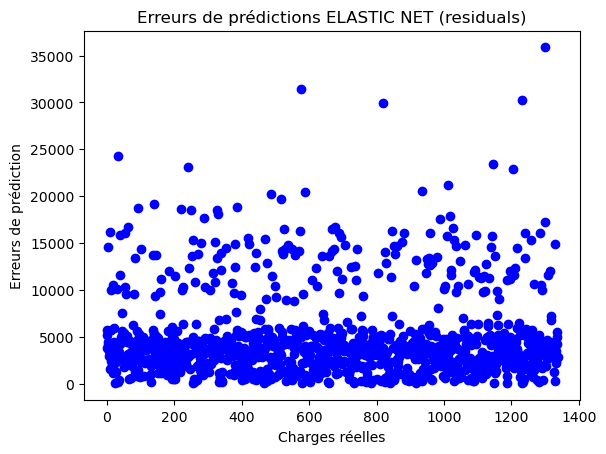

In [770]:
#plot residuals POUR ELASTIC NET 

plt.scatter(y_train.index, residual_enet , color="blue")
plt.title("Erreurs de prédictions ELASTIC NET (residuals)")
plt.xlabel("Charges réelles")
plt.ylabel("Erreurs de prédiction")
plt.show()

In [771]:
# Filter the residuals greater than 20000 
residual_to_drop = residual_enet[residual_enet['charges'] > 15000].index

# Recreate the X_train and y_train
X_train_new_enet = X_train.drop(residual_to_drop)
y_train_new_enet = y_train.drop(residual_to_drop)


# # Retrain the model with new data 
my_pipe_EN.fit(X_train_new_enet, y_train_new_enet)


# # Predict on new data
scores_enet = cross_val_score(my_pipe_EN, X_train_new_enet, y_train_new_enet, cv=5).mean()
print ("my_pipe_e_net score : " , scores_enet )

my_pipe_e_net score :  0.8733300177897648


/home/apprenant/miniconda3/envs/dt_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.840e+08, tolerance: 1.120e+07
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/dt_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+07, tolerance: 8.683e+06
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/dt_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

In [772]:
# my_pipe_EN = make_pipeline(preprocessor, ElasticNet(random_state=42))

# parameters = {"elasticnet__alpha":np.linspace(0.1,0.9,10),"elasticnet__l1_ratio":np.arange(0.0,1.0,0.1)}

# randm_src = GridSearchCV(estimator=my_pipe_EN, param_grid=parameters,scoring='r2',cv = 5)
# randm_src.fit(X_train, y_train)
# print(randm_src.best_params_)

In [773]:
# my_pipe_EN = make_pipeline(preprocessor, ElasticNet(random_state=42))

# parameters = {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.99}



# my_pipe_EN.set_params(**randm_src.best_params_)
# my_pipe_EN.get_params()
# my_pipe_EN.fit(X_train, y_train)
# print ("my_pipe_rg score : " , my_pipe_EN.score(X_test, y_test))
